# Stage 1 : Building MiniLM

## Step 1 : Data preparation and sampling

### Packages

In [ ]:
import torch

if torch.cuda.is_available():
    print("PyTorch is available and CUDA is enabled!")
else:
    print("PyTorch is available, but CUDA is not enabled.")
print(f"PyTorch version: {torch.__version__}")

PyTorch is available and CUDA is enabled!
PyTorch version: 2.6.0+cu124


In [ ]:
!pip install tiktoken
# !pip install torch
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.


### Import libraries

In [ ]:
import torch
import numpy as np
import tiktoken
from datasets import load_dataset
from sklearn.model_selection import train_test_split

### Getting Dataset

In [ ]:
# Step 1: Load Wikipedia Dataset (Hugging Face)
print("Loading Wikipedia dataset (filtered for mental health topics)...")
dataset = load_dataset("wikipedia", "20220301.en", split='train[:10000]') # change 10000 to increase the number of articles

# Step 2: Filter Articles for Mental Health Topics
keywords = ["anxiety", "depression", "PTSD", "bipolar", "mental health", "psychology", "psychiatry","well-being"]
filtered_text = []

for article in dataset:
    content = article['text']
    if any(keyword.lower() in content.lower() for keyword in keywords):
        filtered_text.append(content)

print(f"Filtered Articles Count: {len(filtered_text)}")
print("Sample Text:\n", filtered_text[0][:500])

Loading Wikipedia dataset (filtered for mental health topics)...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

wikipedia.py:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

The repository for wikipedia contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/wikipedia.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


train-00000-of-00041.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

train-00001-of-00041.parquet:   0%|          | 0.00/705M [00:00<?, ?B/s]

train-00002-of-00041.parquet:   0%|          | 0.00/558M [00:00<?, ?B/s]

train-00003-of-00041.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00004-of-00041.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

train-00005-of-00041.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

train-00006-of-00041.parquet:   0%|          | 0.00/366M [00:00<?, ?B/s]

train-00007-of-00041.parquet:   0%|          | 0.00/326M [00:00<?, ?B/s]

train-00008-of-00041.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

train-00009-of-00041.parquet:   0%|          | 0.00/312M [00:00<?, ?B/s]

train-00010-of-00041.parquet:   0%|          | 0.00/267M [00:00<?, ?B/s]

train-00011-of-00041.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

train-00012-of-00041.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00013-of-00041.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

train-00014-of-00041.parquet:   0%|          | 0.00/222M [00:00<?, ?B/s]

train-00015-of-00041.parquet:   0%|          | 0.00/236M [00:00<?, ?B/s]

train-00016-of-00041.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

train-00017-of-00041.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00018-of-00041.parquet:   0%|          | 0.00/241M [00:00<?, ?B/s]

train-00019-of-00041.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00020-of-00041.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

train-00021-of-00041.parquet:   0%|          | 0.00/255M [00:00<?, ?B/s]

train-00022-of-00041.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00023-of-00041.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00024-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00025-of-00041.parquet:   0%|          | 0.00/218M [00:00<?, ?B/s]

train-00026-of-00041.parquet:   0%|          | 0.00/212M [00:00<?, ?B/s]

train-00027-of-00041.parquet:   0%|          | 0.00/206M [00:00<?, ?B/s]

train-00028-of-00041.parquet:   0%|          | 0.00/199M [00:00<?, ?B/s]

train-00029-of-00041.parquet:   0%|          | 0.00/219M [00:00<?, ?B/s]

train-00030-of-00041.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

train-00031-of-00041.parquet:   0%|          | 0.00/216M [00:00<?, ?B/s]

train-00032-of-00041.parquet:   0%|          | 0.00/200M [00:00<?, ?B/s]

train-00033-of-00041.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

train-00034-of-00041.parquet:   0%|          | 0.00/201M [00:00<?, ?B/s]

train-00035-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00036-of-00041.parquet:   0%|          | 0.00/199M [00:00<?, ?B/s]

train-00037-of-00041.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

train-00038-of-00041.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

train-00039-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00040-of-00041.parquet:   0%|          | 0.00/185M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6458670 [00:00<?, ? examples/s]

Filtered Articles Count: 1390
Sample Text:
 Autism is a neurodevelopmental disorder characterized by difficulties with social interaction and communication, and by restricted and repetitive behavior. Parents often notice signs during the first three years of their child's life. These signs often develop gradually, though some autistic children experience regression in their communication and social skills after reaching developmental milestones at a normal pace.

Autism is associated with a combination of genetic and environmental factors


In [ ]:
# Step 3: Save Filtered Text to a .txt File
file_path = "filtered_articles.txt"
with open(file_path, "w", encoding="utf-8") as f:
    for article in filtered_text:
        f.write(article + "\n\n")  # Add double newline for separation

print(f"Saved {len(filtered_text)} articles to {file_path}")

Saved 1390 articles to filtered_articles.txt


### Byte-Pair Encoding

In [ ]:
# Step 3: Byte-Pair Encoding (BPE) using Tiktoken
encoder = tiktoken.get_encoding("cl100k_base")
encoded = [encoder.encode(text) for text in filtered_text]
flattened_encoded = [token for sublist in encoded for token in sublist]
print(f"Encoded Length: {len(flattened_encoded)} tokens")
print(f"Encoded Sample: {flattened_encoded[:50]}")

Encoded Length: 12282993 tokens
Encoded Sample: [20175, 2191, 374, 264, 18247, 30671, 278, 19823, 32971, 555, 27129, 449, 3674, 16628, 323, 10758, 11, 323, 555, 22486, 323, 59177, 7865, 13, 44026, 3629, 5406, 12195, 2391, 279, 1176, 2380, 1667, 315, 872, 1716, 596, 2324, 13, 4314, 12195, 3629, 2274, 27115, 11, 3582, 1063, 81391, 2911, 3217]


### Sampling with Sliding Window

In [ ]:
# Step 4: Data Sampling with Sliding Window
window_size = 128
stride = 64

# Generate sliding windows
samples = [flattened_encoded[i:i + window_size] for i in range(0, len(flattened_encoded) - window_size + 1, stride)]
print(f"Number of samples: {len(samples)}")
print("Sample window of tokens:\n", samples[0])

Number of samples: 191920
Sample window of tokens:
 [20175, 2191, 374, 264, 18247, 30671, 278, 19823, 32971, 555, 27129, 449, 3674, 16628, 323, 10758, 11, 323, 555, 22486, 323, 59177, 7865, 13, 44026, 3629, 5406, 12195, 2391, 279, 1176, 2380, 1667, 315, 872, 1716, 596, 2324, 13, 4314, 12195, 3629, 2274, 27115, 11, 3582, 1063, 81391, 2911, 3217, 31649, 304, 872, 10758, 323, 3674, 7512, 1306, 19261, 48006, 69376, 520, 264, 4725, 18338, 382, 20175, 2191, 374, 5938, 449, 264, 10824, 315, 19465, 323, 12434, 9547, 13, 32388, 9547, 2391, 20209, 2997, 3738, 30020, 11, 1778, 439, 10485, 6985, 11, 62186, 2737, 1062, 782, 292, 13935, 11, 13200, 11, 39123, 11, 61257, 11, 3063, 11, 323, 3805, 25793, 11, 63746, 6650, 20020, 11, 323, 88191, 19338, 13, 2140, 12848, 552, 9172, 1023, 11223, 12434, 11384, 26]


### Token Embeddings

In [ ]:
# Step 5: Token Embeddings
vocab_size = encoder.n_vocab
print(f"Vocabulary Size: {vocab_size}")

embedding_dim = 256

embedding_layer = torch.nn.Embedding(vocab_size, embedding_dim)
sample_tensor = torch.tensor(samples[:10], dtype=torch.long)

# Obtain embeddings
embedded_tokens = embedding_layer(sample_tensor)
print(f"Shape of Embedded Tokens: {embedded_tokens.shape}")

Vocabulary Size: 100277
Shape of Embedded Tokens: torch.Size([10, 128, 256])


### Positional Encoding

In [ ]:
# Step 6: Positional Encoding
def positional_encoding(seq_len, embed_dim):
    pe = torch.zeros(seq_len, embed_dim)
    for pos in range(seq_len):
        for i in range(0, embed_dim, 2):
            pe[pos, i] = np.sin(pos / (10000 ** ((2 * i) / embed_dim)))
            if i + 1 < embed_dim:
                pe[pos, i + 1] = np.cos(pos / (10000 ** ((2 * (i + 1)) / embed_dim)))
    return pe

pos_encoding = positional_encoding(window_size, embedding_dim)
print(f"Positional Encoding Shape: {pos_encoding.shape}")

# Adding positional encoding to embeddings
embedded_tokens += pos_encoding

Positional Encoding Shape: torch.Size([128, 256])


### Final Input to step 2 (Stage 1)

In [ ]:
# Step 7: Train-Test Split
train_data, val_data = train_test_split(samples, test_size=0.3, random_state=42)
print(f"Training Samples: {len(train_data)}, Validation Samples: {len(val_data)}")

# Save Data for Further Stages
torch.save((train_data, val_data, embedding_layer.state_dict()), "prepared_data_wiki.pth")
print("Data preparation complete! Processed data saved as 'prepared_data_wiki.pth'")

Training Samples: 134344, Validation Samples: 57576
Data preparation complete! Processed data saved as 'prepared_data_wiki.pth'


## Step 2 : Attention Mechanism

### Import libraries

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

### Load the data and embedding layer

In [ ]:
# Step 1: Load Prepared Data
print("Loading prepared data from Stage 1, Step 1...")
train_data, val_data, embedding_weights = torch.load("prepared_data_wiki.pth")

# Load embedding layer state
# Access the 'weight' tensor within the OrderedDict
embedding_weights_tensor = embedding_weights['weight']
vocab_size = embedding_weights_tensor.shape[0]  # Now use .shape on the tensor
embedding_dim = embedding_weights_tensor.shape[1]

embedding_layer = nn.Embedding(vocab_size, embedding_dim)
embedding_layer.load_state_dict({'weight': embedding_weights_tensor})  # Pass the tensor
print("Data loaded successfully!")

Loading prepared data from Stage 1, Step 1...
Data loaded successfully!


### Scaled Dot product attention

In [ ]:
# Step 2: Optimized Scaled Dot-Product Attention
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, query, key, value, mask=None):
        d_k = query.size(-1)  # Dimension of query/key
        scores = torch.matmul(query, key.transpose(-2, -1)) / np.sqrt(d_k)  # Scaled Dot-Product

        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)  # Apply mask if available

        attention_weights = F.softmax(scores, dim=-1)  # Softmax on last dimension
        output = torch.matmul(attention_weights, value)
        return output, attention_weights

### Multi Head Attention

In [ ]:
# Step 3: Multi-Head Attention Mechanism
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_size, num_heads):
        super().__init__()
        assert embed_size % num_heads == 0

        self.embed_size = embed_size
        self.num_heads = num_heads
        self.head_dim = embed_size // num_heads

        # Define layers
        self.query_linear = nn.Linear(embed_size, embed_size)
        self.key_linear = nn.Linear(embed_size, embed_size)
        self.value_linear = nn.Linear(embed_size, embed_size)
        self.fc_out = nn.Linear(embed_size, embed_size)

        self.attention = ScaledDotProductAttention()

    def forward(self, x):
        batch_size, seq_length, embed_size = x.shape

        # Linear projections
        query = self.query_linear(x)
        key = self.key_linear(x)
        value = self.value_linear(x)

        # Split into multiple heads
        query = query.view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)
        key = key.view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)
        value = value.view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)

        # Attention
        attention_out, attn_weights = self.attention(query, key, value)

        # Concatenate heads
        attention_out = attention_out.transpose(1, 2).contiguous().view(batch_size, seq_length, embed_size)

        # Final linear layer
        out = self.fc_out(attention_out)
        return out, attn_weights

### Test Attention Mechanism

Attention Output Shape: torch.Size([2, 128, 256])
Attention Weights Shape: torch.Size([2, 4, 128, 128])


<Figure size 800x600 with 0 Axes>

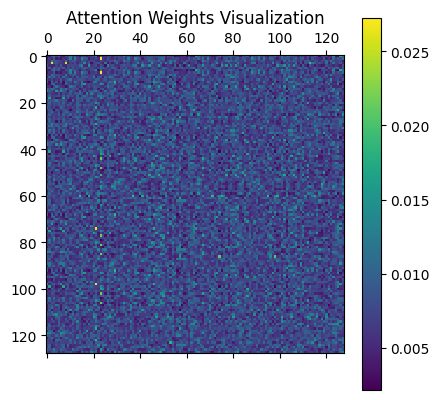

In [ ]:
# Step 4: Sample Attention Mechanism in Action
def demonstrate_attention():
    sample_data = torch.tensor(train_data[:2], dtype=torch.long)  # Using first 2 samples
    embedded_sample = embedding_layer(sample_data)  # Shape: (batch_size, seq_length, embedding_dim)

    # Create multi-head attention
    num_heads = 4
    attention_layer = MultiHeadAttention(embedding_dim, num_heads)
    output, attention_weights = attention_layer(embedded_sample)

    print("Attention Output Shape:", output.shape)
    print("Attention Weights Shape:", attention_weights.shape)

    # Visualize Attention Weights
    plt.figure(figsize=(8, 6))
    plt.matshow(attention_weights[0].detach().numpy()[0], cmap='viridis')
    plt.colorbar()
    plt.title("Attention Weights Visualization")
    plt.show()

    return attention_layer

attention_layer = demonstrate_attention()

### Save attention mechanism

In [ ]:
# Step 5: Save Attention Mechanism
torch.save(attention_layer.state_dict(), "attention_mechanism.pth")
print("Attention Mechanism saved successfully as 'attention_mechanism.pth'")

Attention Mechanism saved successfully as 'attention_mechanism.pth'


## Step 3 : LLM Architecture

### Libraries and Loading Data

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Step 1: Load Prepared Data from Stage 1, Step 1
print("Loading prepared data from Stage 1, Step 1...")
train_data, val_data, embedding_weights = torch.load("prepared_data_wiki.pth")

# Access the 'weight' tensor within the OrderedDict
embedding_weights_tensor = embedding_weights['weight']
vocab_size = embedding_weights_tensor.shape[0]  # Now use .shape on the tensor
embedding_dim = embedding_weights_tensor.shape[1]

print(f"Vocabulary Size: {vocab_size}")
print(f"Embedding Dimension: {embedding_dim}")

Using device: cuda
Loading prepared data from Stage 1, Step 1...
Vocabulary Size: 100277
Embedding Dimension: 256


### LayerNorm and GELU

In [ ]:
# Step 2: LayerNorm and GELU Activation
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

class GELU(nn.Module):
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            np.sqrt(2 / np.pi) * (x + 0.044715 * torch.pow(x, 3))
        ))

### Feedforward Network

In [ ]:
# Step 3: FeedForward Network
class FeedForward(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(emb_dim, 4 * emb_dim),
            GELU(),
            nn.Linear(4 * emb_dim, emb_dim)
        )

    def forward(self, x):
        return self.net(x)

### MultiHead Attention with pretrained load



In [ ]:
# Step 4: Multi-Head Attention Mechanism (Load Pretrained if Available)
class ScaledDotProductAttention(nn.Module):
    def forward(self, query, key, value, mask=None):
        d_k = query.size(-1)
        scores = torch.matmul(query, key.transpose(-2, -1)) / np.sqrt(d_k)

        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)

        attn_weights = F.softmax(scores, dim=-1)
        return torch.matmul(attn_weights, value), attn_weights

class MultiHeadAttention(nn.Module):
    def __init__(self, emb_dim, num_heads):
        super().__init__()
        self.emb_dim = emb_dim
        self.num_heads = num_heads
        # Ensure head_dim is an integer by performing floor division
        self.head_dim = emb_dim // num_heads
        # Add assertion to ensure emb_dim is divisible by num_heads
        assert emb_dim % num_heads == 0, "Embedding dimension must be divisible by number of heads"

        self.query = nn.Linear(emb_dim, emb_dim)
        self.key = nn.Linear(emb_dim, emb_dim)
        self.value = nn.Linear(emb_dim, emb_dim)
        self.fc_out = nn.Linear(emb_dim, emb_dim)

        self.attention = ScaledDotProductAttention()

        # Load pretrained weights if available
        if os.path.exists("attention_mechanism.pth"):
            print("Loading pretrained attention mechanism from 'attention_mechanism.pth'...")
            state_dict = torch.load("attention_mechanism.pth")

            # Update keys in the state dictionary to match current model
            # Create a new state dictionary with updated keys
            updated_state_dict = {}
            for k, v in state_dict.items():
                # Replace 'query_linear', 'key_linear', 'value_linear' with 'query', 'key', 'value'
                k = k.replace('query_linear', 'query').replace('key_linear', 'key').replace('value_linear', 'value')
                updated_state_dict[k] = v

            self.load_state_dict(updated_state_dict) # Load the updated state dictionary

        else:
            print("Pretrained attention mechanism not found, using default initialization.")

    def forward(self, x):
        batch_size, seq_len, emb_dim = x.shape
        q = self.query(x).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        k = self.key(x).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        v = self.value(x).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)

        attn_output, _ = self.attention(q, k, v)
        attn_output = attn_output.transpose(1, 2).contiguous().view(batch_size, seq_len, emb_dim)
        return self.fc_out(attn_output)

### Transformer Block

In [ ]:
# Step 5: Transformer Block
class TransformerBlock(nn.Module):
    def __init__(self, emb_dim, num_heads):
        super().__init__()
        self.attention = MultiHeadAttention(emb_dim, num_heads)
        self.norm1 = LayerNorm(emb_dim)
        self.ffn = FeedForward(emb_dim)
        self.norm2 = LayerNorm(emb_dim)

    def forward(self, x):
        attn_output = self.attention(self.norm1(x))
        x = x + attn_output
        ffn_output = self.ffn(self.norm2(x))
        return x + ffn_output

### GPT model

In [ ]:
# Step 6: GPT Model (LLM Architecture)
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop = nn.Dropout(cfg["drop_rate"])

        self.layers = nn.ModuleList([
            TransformerBlock(cfg["emb_dim"], cfg["n_heads"]) for _ in range(cfg["n_layers"])
        ])

        self.norm = LayerNorm(cfg["emb_dim"])
        self.fc_out = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def forward(self, idx):
        batch_size, seq_len = idx.shape
        tok_emb = self.tok_emb(idx)
        pos_emb = self.pos_emb(torch.arange(seq_len, device=idx.device))
        x = self.drop(tok_emb + pos_emb)

        for layer in self.layers:
            x = layer(x)

        x = self.norm(x)
        logits = self.fc_out(x)
        return logits

# Step 7: Model Configuration
config = {
    "vocab_size": vocab_size,
    "context_length": 1024,
    "emb_dim": 256,
    "n_heads": 16,
    "n_layers": 16,
    "drop_rate": 0.1,
    "qkv_bias": False
}

model = GPTModel(config).to(device)
print("Model initialized successfully!")

# Step 8: Sample Output from LLM
sample_data = torch.tensor(train_data[:2], dtype=torch.long).to(device)
print("Input Sample:", sample_data)

logits = model(sample_data)
print("Logits Shape:", logits.shape)

Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attent

### Save LLM Architecture

In [ ]:
# Step 9: Save the LLM Architecture
torch.save(model.state_dict(), "llm_architecture.pth")
print("LLM Architecture saved successfully as 'llm_architecture.pth'")

LLM Architecture saved successfully as 'llm_architecture.pth'


### Calculate number of parameters

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GPTModel(config).to(device)

# Calculate total parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total Parameters in Custom LLM: {total_params:,}")
print(f"Trainable Parameters in Custom LLM: {trainable_params:,}")

Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attention_mechanism.pth'...
Loading pretrained attention mechanism from 'attent

## --------------- STAGE 1 ENDS -------------------